In [6]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import itertools
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('/Users/claudia/Ironhack/Week3/goup_project/data_companies.csv')

In [8]:
data.shape

(4099, 11)

In [9]:
#data.head(20)

In [10]:
data['ID'].duplicated().sum()

212

In [11]:
data.drop_duplicates(subset ="ID",keep = False, inplace = True) 

In [12]:
data

,Unnamed: 0,ID,position,company,reviews,size,industry,location,state,zip_code,description
0,0,3,Data Analyst,Operation HOPE,44.0,medium,non-profit organization management,Atlanta,GA,30303.0,DEPARTMENT: Program OperationsPOSITION LOCATIO...
1,1,4,Assistant Professor -TT - Signal Processing & ...,Emory University,550.0,very big,higher education,Atlanta,GA,NaN,DESCRIPTION\nThe Emory University Department o...
2,2,5,Manager of Data Engineering,McKinsey & Company,385.0,very big,management consulting,Atlanta,GA,30318.0,Qualifications\nBachelor’s degree in Computer ...
3,3,6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,385.0,very big,management consulting,Atlanta,GA,30318.0,Qualifications\nBachelor’s degree\n5-7 years o...
6,6,10,STATISTICAL FORECAST ANALYST,The Home Depot,38844.0,very big,retail,Atlanta,GA,NaN,:\n\nThe Statistical Forecast Analyst position...
...,...,...,...,...,...,...,...,...,...,...,...
4094,4094,6945,"VP Marketing, Strategy, Analytics & Data Science","Williams-Sonoma, Inc.",1578.0,big,retail,San Francisco,CA,94111.0,"Our Company\n\nFounded in 1956, Williams-Sonom..."
4095,4095,6947,IVD Bioinformatics Scientist,Guardant Health,7.0,medium,biotechnology,Redwood City,CA,94063.0,"Job Description\n\nAt Guardant Health, we are ..."
4096,4096,6949,"Scientist, Cancer Immunology Biology",Pfizer,4214.0,very big,pharmaceuticals,San Francisco,CA,NaN,"A career at Pfizer offers opportunity, ownersh..."
4097,4097,6950,Developer Evangelist - Data Science and Deep L...,Samsung NEXT,NaN,small,consumer electronics,San Francisco,CA,NaN,Samsung NEXT’s MissingLink product team is in ...


In [13]:
# Group listings for data analysts 

data_analyst = data[data['position'].str.contains("Data Analyst|Data analyst|data analyst|Analyst|analyst]")] 
data_analyst_txt = data_analyst.position.values
#data_analyst_txt

In [14]:
data_analyst.shape

(467, 11)

In [15]:
data_scientist = data[data['position'].str.contains("Data Scientist|Data scientist|data scientist|Scientist|scientist")] 
data_scientist_text = data_scientist.position.values

In [16]:
data_scientist.shape

(1364, 11)

In [17]:
engineer = data[data['position'].str.contains("Engineer|engineer|Programmer|programmer|Developer|developer")] 
engineer_text = engineer.position.values

In [18]:
engineer.shape

(841, 11)

In [19]:
def clean_column(text):
    if text in data_analyst_txt:
        return 'analyst'
    elif text in data_scientist_text:
        return 'data scientist'
    elif text in engineer_text:
        return 'engineer'
    else:
        return 'other'

data['position'] = list(map(clean_column, data['position']))

In [20]:
df = pd.DataFrame(data['position'].value_counts())

In [21]:
df

,position
data scientist,1348
other,1128
engineer,768
analyst,467


In [22]:
data.head()

,Unnamed: 0,ID,position,company,reviews,size,industry,location,state,zip_code,description
0,0,3,analyst,Operation HOPE,44.0,medium,non-profit organization management,Atlanta,GA,30303.0,DEPARTMENT: Program OperationsPOSITION LOCATIO...
1,1,4,other,Emory University,550.0,very big,higher education,Atlanta,GA,NaN,DESCRIPTION\nThe Emory University Department o...
2,2,5,engineer,McKinsey & Company,385.0,very big,management consulting,Atlanta,GA,30318.0,Qualifications\nBachelor’s degree in Computer ...
3,3,6,other,McKinsey & Company,385.0,very big,management consulting,Atlanta,GA,30318.0,Qualifications\nBachelor’s degree\n5-7 years o...
6,6,10,other,The Home Depot,38844.0,very big,retail,Atlanta,GA,NaN,:\n\nThe Statistical Forecast Analyst position...


In [23]:
data['position'].value_counts()

data scientist    1348
other             1128
engineer           768
analyst            467
Name: position, dtype: int64

In [24]:
data['size'].value_counts()

very big    1158
big         1033
small        823
medium       697
Name: size, dtype: int64

In [27]:
data_copy = data.drop(data[data['position'].str.contains('other')].index.tolist())

In [28]:
data_copy

,Unnamed: 0,ID,position,company,reviews,size,industry,location,state,zip_code,description
0,0,3,analyst,Operation HOPE,44.0,medium,non-profit organization management,Atlanta,GA,30303.0,DEPARTMENT: Program OperationsPOSITION LOCATIO...
2,2,5,engineer,McKinsey & Company,385.0,very big,management consulting,Atlanta,GA,30318.0,Qualifications\nBachelor’s degree in Computer ...
7,7,11,data scientist,Chenega Corporation,390.0,medium,information technology and services,Atlanta,GA,NaN,"Chenega Professional &amp; Technical Services,..."
10,10,13,data scientist,Emory University,550.0,very big,higher education,Atlanta,GA,NaN,"DESCRIPTION\nUnder minimal supervision, the As..."
11,11,14,analyst,Newell Brands,912.0,very big,consumer goods,Atlanta,GA,NaN,Data Science Analyst– Business Intelligence\nL...
...,...,...,...,...,...,...,...,...,...,...,...
4093,4093,6944,data scientist,Merck,2987.0,very big,pharmaceuticals,South San Francisco,CA,NaN,Requisition ID: RES002097\n\nMerck Research La...
4095,4095,6947,data scientist,Guardant Health,7.0,medium,biotechnology,Redwood City,CA,94063.0,"Job Description\n\nAt Guardant Health, we are ..."
4096,4096,6949,data scientist,Pfizer,4214.0,very big,pharmaceuticals,San Francisco,CA,NaN,"A career at Pfizer offers opportunity, ownersh..."
4097,4097,6950,engineer,Samsung NEXT,NaN,small,consumer electronics,San Francisco,CA,NaN,Samsung NEXT’s MissingLink product team is in ...


In [29]:
import seaborn as sns

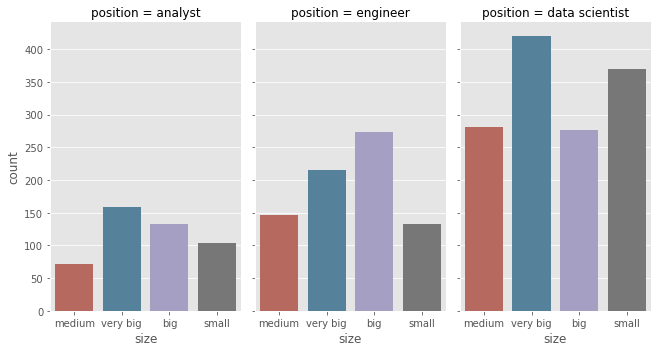

In [34]:
g_no_other = sns.catplot(x="size", col="position",

                data=data_copy, saturation=.5, kind="count", 
                         estimator=(lambda x: len(x) / len(data_copy) * 100), ci=None, aspect=.6)
  

In [32]:
g_no_other.savefig('size', dpi=300)

In [ ]:
ax = sns.barplot(x="size", y="x", data=df, 
                 estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

In [ ]:
#df_position_counts = pd.DataFrame(data['industry'].value_counts())

In [ ]:
#df_position_counts = df_position_counts.reset_index()
#df_position_counts.columns =['industry','counts']
#df_position_counts

In [ ]:
#position_counts = df_position_counts[df_position_counts['counts']>=119]

In [ ]:
#position_counts_arr = list(position_counts['industry'])
#position_counts_arr

In [ ]:
#position_counts

In [ ]:
def count_industry(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [ ]:
#count_industry(data_scientist_ind)

In [ ]:
data_scientist_ind = data_scientist.industry.values

In [ ]:
engineer_ind = engineer.industry.values

In [ ]:
data_analyst_ind = data_analyst.industry.values

In [ ]:
industries = ['internet',
 'computer software',
 'biotechnology',
 'information technology and services',
 'defense & space',
 'financial services',
 'research',
 'staffing and recruiting',
 'hospital & health care',
 'pharmaceuticals']

industries_patt = ['(?i)\Winternet\W','(?i)\Wcomputer software\W?','(?i)biotechnology\W?','(?i)\Winformation technology and services\W?',
              "(?i)\Wdefense & space\W?","(?i)\Wfinancial services\W?","(?i)\Wresearch\s?BI\W?",
              "(?i)\Wstaffing and recruiting\W?",'(?i)\Whospital & health care\W?', '(?i)\Wpharmaceuticals\W?']

industry = pd.DataFrame(
{'industry' : industries,
'regex_pattern': industries_patt})

In [ ]:
i = []
for x in industry['industry']:
    i.append(count_industry(x,data_scientist_ind))
industry['count'] = i
industry['Data Scientist'] = round(industry['count']/len(data_scientist_ind),2)
industry

In [ ]:
i = []
for x in industry['industry']:
    i.append(count_industry(x,engineer_ind))
industry['count'] = i
industry['Engineer'] = round(industry['count']/len(engineer_ind),2)
industry

In [ ]:
i = []
for x in industry['industry']:
    i.append(count_industry(x,data_analyst_ind))
industry['count'] = i
industry['Data Analyst'] = round(industry['count']/len(data_analyst_ind),2)
industry

In [ ]:
position= ["Analyst", "Scientist", "Engineer"]

In [ ]:
new_data= []
for index,row in industry.iterrows():
    new_data.append(dict(industry =row['industry'], pct= row['Data Analyst']*100,position='Analyst'))
    new_data.append(dict(industry =row['industry'], pct=row['Data Scientist']*100,position='Scientist'))
    new_data.append(dict(industry =row['industry'], pct=row['Engineer']*100,position='Engineer'))

industry_flat= pd.DataFrame.from_records(new_data) 

In [ ]:
industry_flat.head()

In [ ]:
g_2 = sns.catplot(x="pct", y="industry",

                col="position",

                data=industry_flat, kind="bar",

                height=5, aspect= 1);

In [ ]:
g_2.savefig('industry_2', dpi=300)

In [ ]:
sns.set_style("white") #whitegrid,dark
sns.set_context("notebook")
sns.set_context(font_scale=2, rc={'font.size':15,'axes.labelsize':15})
#plt.figure(figsize=(8,8))
sns.set_context('notebook')

option3= sns.factorplot(x= "pct", y="industry", hue= 'position', data=industry_flat,
             size=6, kind='bar', palette='magma', edgecolor = 'w', legend_out=False)
plt.title('Industry')
plt.show()
option3.savefig("industry.png", dpi=300)